# EDA

Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load the data
labels = pd.read_csv('../data/raw/labels.csv', index_col=0)
labels.head()

,filename,label
image_id,,
1,1.jpg,2
2,2.jpg,4
3,3.jpg,2
4,4.jpg,3
5,5.jpg,5


Text(0.5, 1.0, 'Distribution of Labels')

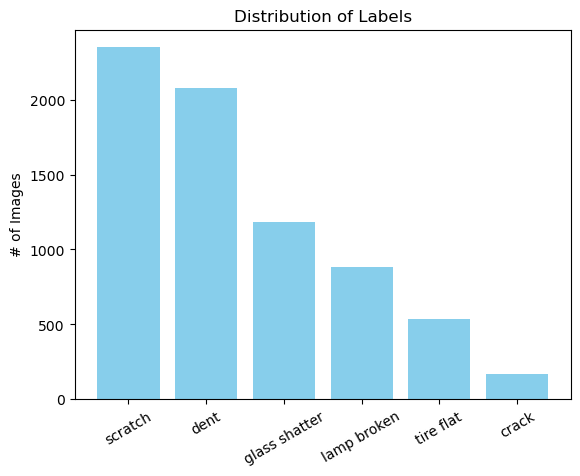

In [4]:
label_code = pd.Series({1: 'crack', 2: 'scratch', 3: 'tire flat', 4: 'dent', 5: 'glass shatter', 6: 'lamp broken'})

label_counts = labels['label'].value_counts()
plt.bar(label_code[label_counts.index], label_counts, color='skyblue')
plt.tick_params(axis='x', rotation=30)
plt.ylabel('# of Images')
plt.title('Distribution of Labels')

In [4]:
label_counts

label
2    2349
4    2079
5    1185
6     882
3     534
1     171
Name: count, dtype: int64

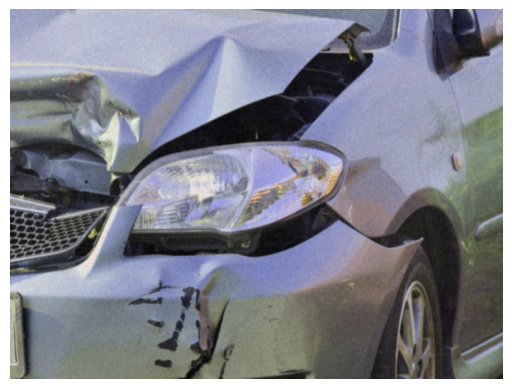

In [20]:
image = Image.open(f'../data/raw/images/{labels[labels["label"] == 4]["filename"].values[20]}')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# shape of the above image
np.array(image).shape # (height, width, channels)

(1026, 1368, 3)

In [ ]:
np.array(image.crop([100,100,900,900])).shape # test cropping

(800, 800, 3)

In [ ]:
# find average image size and, while reducing resolution, resize accordingly
sizes = []
for file in labels["filename"].values[:500]: # loop through first 500 images
    img = Image.open(f'../data/raw/images/{file}').convert('L') # convert to grayscale
    sizes.append(np.array(img).shape) # get shape of image
print('avg img size:', np.mean(sizes, axis=0))
print('reduce length & width by factor of 5.35:', np.mean(sizes, axis=0)//5.35)

avg img size: [ 804.558 1073.238]
reduce length & width by factor of 5.35: [150. 200.]


I will use a standard size of (150, 200), and crop 10 pixels on each side to end up with (130, 180)

## Preprocess Image Data

In [ ]:
import sys
sys.path.append('../')
import src.data_loader as dl

dl.process_raw_img_data()

In [21]:
import sys
sys.path.append('../')
import src.data_loader as dl
X_train, y_train = dl.load_data('../data/processed/train/images')

In [26]:
X_train.shape

(5623, 130, 180, 1)

In [27]:
y_train.shape

(5623, 5)

## PCA

Attempt to cluster or reduce dimension in a meaningful way with principal component analysis.

In [ ]:
# turn X_train to 2D array with dim 5000x(130*180)
X_train = X_train.reshape(X_train.shape[0], -1)
X_train.shape

(5623, 23400)

In [32]:
# turn y_train to 1D array where the value is index of the 1 in the one-hot encoding
y_train = np.argmax(y_train, axis=1)
y_train

array([0, 2, 2, ..., 2, 2, 2])

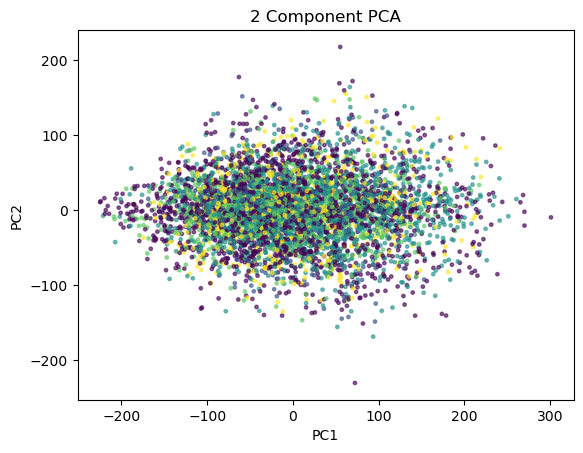

array([0.29106621, 0.08702111])

In [ ]:
# perform 2 component PCA on X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis', alpha=.6, s=6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 Component PCA')
plt.show()

pca.explained_variance_ratio_

total variance explained: 0.8422951498760423


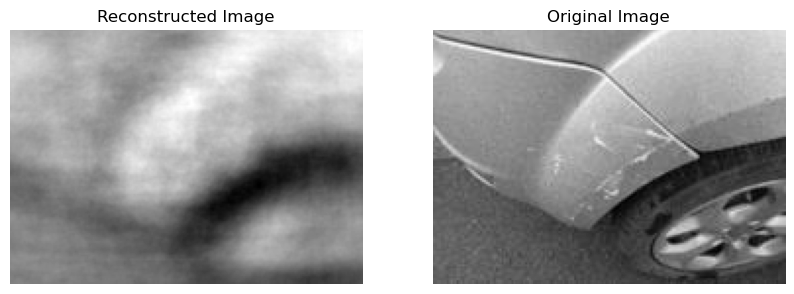

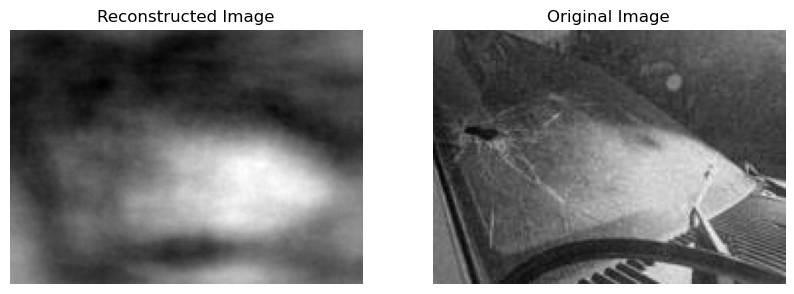

In [47]:
# perform 100 component PCA on X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)

print(f'total variance explained: {pca.explained_variance_ratio_.sum()}')

# Show an image recontructed from PCA
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_train_reconstructed = X_train_reconstructed.reshape(X_train.shape)

# Show the reconstructed image and original image side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X_train_reconstructed[0].reshape(130,180), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Reconstructed Image')

ax[1].imshow(X_train[0].reshape(130,180), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Original Image')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X_train_reconstructed[7].reshape(130,180), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Reconstructed Image')

ax[1].imshow(X_train[7].reshape(130,180), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Original Image')
plt.show()


In [46]:
# perform SVC on X_train with 100 component PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()
scores = cross_val_score(svc, X_train_pca, y_train, cv=5)
print(f'cross validation scores: {scores}')
print(f'average cross validation score: {scores.mean()}')

cross validation scores: [0.51644444 0.51822222 0.52355556 0.5088968  0.51957295]
average cross validation score: 0.5173383946223804


total variance explained: 0.9390785609300771


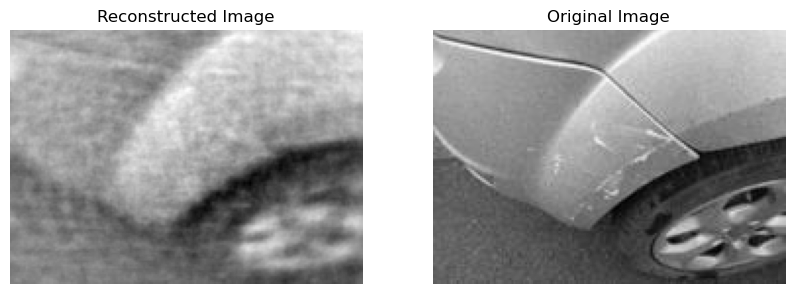

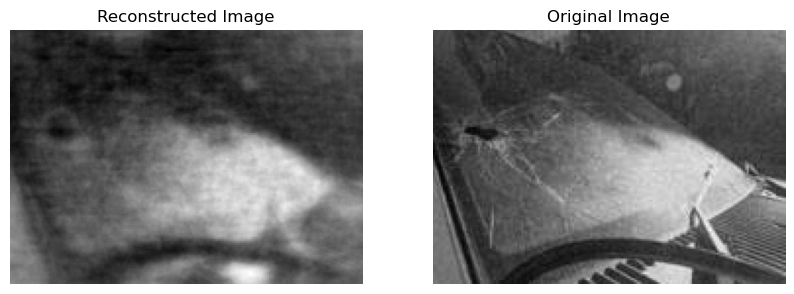

In [ ]:
# perform 500 component PCA on X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=500)
X_train_pca = pca.fit_transform(X_train_scaled)

print(f'total variance explained: {pca.explained_variance_ratio_.sum()}')

# Show an image recontructed from PCA
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_train_reconstructed = X_train_reconstructed.reshape(X_train.shape)

# Show the reconstructed image and original image side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X_train_reconstructed[0].reshape(130,180), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Reconstructed Image')

ax[1].imshow(X_train[0].reshape(130,180), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Original Image')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X_train_reconstructed[7].reshape(130,180), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Reconstructed Image')

ax[1].imshow(X_train[7].reshape(130,180), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Original Image')
plt.show()

In [49]:
# perform SVC on X_train with 500 component PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()
scores = cross_val_score(svc, X_train_pca, y_train, cv=5)
print(f'cross validation scores: {scores}')
print(f'average cross validation score: {scores.mean()}')

cross validation scores: [0.57511111 0.55111111 0.56977778 0.54448399 0.55516014]
average cross validation score: 0.5591288256227759


total variance explained: 0.99068777058276


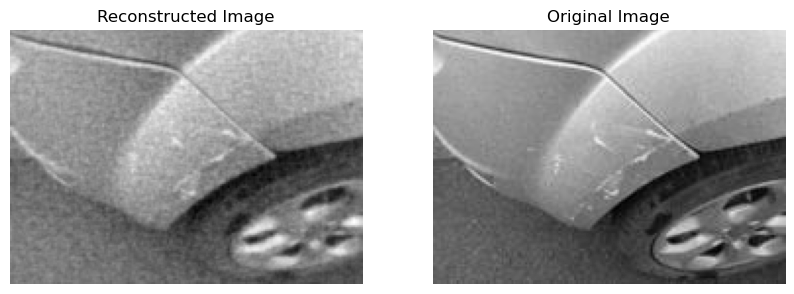

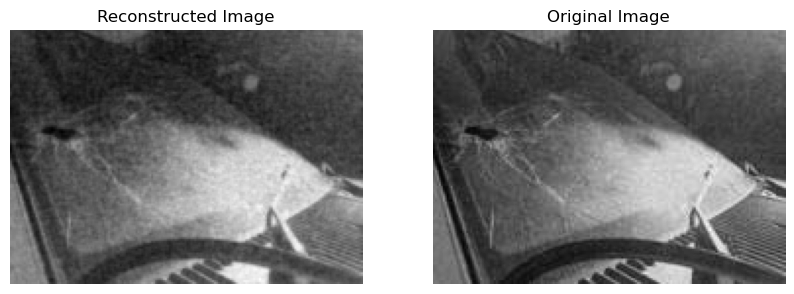

In [50]:
# perform 2000 component PCA on X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2000)
X_train_pca = pca.fit_transform(X_train_scaled)

print(f'total variance explained: {pca.explained_variance_ratio_.sum()}')

# Show an image recontructed from PCA
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_train_reconstructed = X_train_reconstructed.reshape(X_train.shape)

# Show the reconstructed image and original image side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X_train_reconstructed[0].reshape(130,180), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Reconstructed Image')

ax[1].imshow(X_train[0].reshape(130,180), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Original Image')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X_train_reconstructed[7].reshape(130,180), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Reconstructed Image')

ax[1].imshow(X_train[7].reshape(130,180), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Original Image')
plt.show()

In [51]:
# perform SVC on X_train with 2000 component PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()
scores = cross_val_score(svc, X_train_pca, y_train, cv=5)
print(f'cross validation scores: {scores}')
print(f'average cross validation score: {scores.mean()}')

cross validation scores: [0.58933333 0.57422222 0.59466667 0.56672598 0.55871886]
average cross validation score: 0.5767334124159748
